# New Section

UPLOAD THE DATASET



In [1]:
import zipfile

zip_path = "/content/archive (2).zip"
extract_to = "/content/dataset/"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)
    import os

files = os.listdir(extract_to)
print("Extracted files:", files)

import pandas as pd

fake_path = "/content/dataset/Fake.csv"
real_path = "/content/dataset/True.csv"

df_fake = pd.read_csv(fake_path)
df_real = pd.read_csv(real_path)

print("Datasets loaded successfully!")

Extracted files: ['True.csv', 'Fake.csv']
Datasets loaded successfully!


# New Section

# New Section

# New Section

IMPORTING THE NECESSARY LIBRARIES


In [2]:
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
nltk.download('punkt_tab')




[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [4]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [5]:
df_fake = pd.read_csv("dataset/Fake.csv")
df_real = pd.read_csv("dataset/True.csv")


df_fake['label'] = 0
df_real['label'] = 1

df = pd.concat([df_fake, df_real], axis=0).reset_index(drop=True)

df = df[['text', 'label']]

**PREPROCESSING**

In [6]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

df['clean_text'] = df['text'].apply(preprocess_text)


In [7]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
accuracy_scores = {}

**MULTINATIONAL NAIVE BAYES HYPERPARAMETER**

In [9]:

mnb_params = {'alpha': [0.1, 0.5, 1, 5, 10]}
mnb = GridSearchCV(MultinomialNB(), mnb_params, cv=5, scoring='accuracy')
mnb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1, 5, 10]}, scoring='accuracy')

SELECTING BEST ALPHA

In [10]:
# Best model
best_mnb = mnb.best_estimator_
test_accuracy = best_mnb.score(X_test, y_test)
cv_score = mnb.best_score_

In [11]:
print(f"🔹 Best Alpha: {mnb.best_params_['alpha']}, Test Accuracy = {test_accuracy:.4f}, CV Score = {cv_score:.4f}")

🔹 Best Alpha: 0.1, Test Accuracy = 0.9304, CV Score = 0.9330


In [12]:
def predict_fake_news(statement, model):
    processed_statement = preprocess_text(statement)
    transformed_statement = vectorizer.transform([processed_statement])
    prediction = model.predict(transformed_statement)
    return "Real News" if prediction[0] == 1 else "Fake News"

INPUT SHELL


In [13]:
test_statement = "india is a country"
prediction = predict_fake_news(test_statement, best_mnb)
print(f"\nPrediction for test statement: \"{test_statement}\" ➝ {prediction}")


Prediction for test statement: "india is a country" ➝ Real News


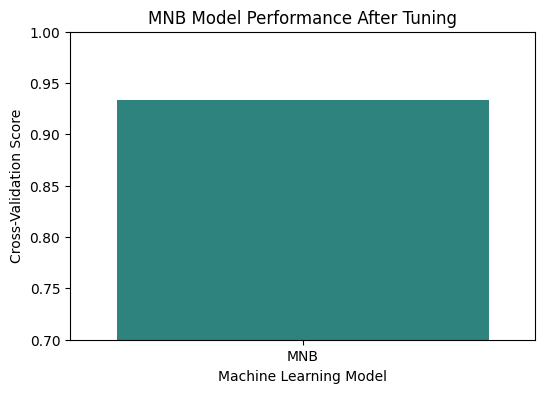

In [14]:
plt.figure(figsize=(6, 4))
sns.barplot(x=["MNB"], y=[cv_score], hue=["MNB"], palette="viridis", legend=False)
plt.xlabel("Machine Learning Model")
plt.ylabel("Cross-Validation Score")
plt.title("MNB Model Performance After Tuning")
plt.ylim(0.7, 1)  # Adjust scale for better visualization
plt.show()

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

# =========================
# For MNB and SVM (clean_text)
# =========================
# Vectorize using clean_text for MNB and SVM
vectorizer = TfidfVectorizer(max_features=50000)
X_clean = vectorizer.fit_transform(df['clean_text'])
y = df['label']

# Train-test split for MNB and SVM using clean_text
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X_clean, y, test_size=0.2, random_state=42)

# Train SVM
svm_params = {'C': [0.1, 1, 10]}
svm = GridSearchCV(LinearSVC(), svm_params, cv=5, scoring='accuracy', n_jobs=-1)
svm.fit(X_train_clean, y_train_clean)

# Predict using SVM
y_pred_svm = svm.predict(X_test_clean)

# Print classification report for SVM
print("SVM Classification Report:")
print(classification_report(y_test_clean, y_pred_svm))

X_text = df['text']
y = df['label']


X_train_text, X_test_text, y_train_text, y_test_text = train_test_split(X_text, y, test_size=0.2, random_state=42)


tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train_text)
X_test_tfidf = tfidf.transform(X_test_text)
from sklearn.linear_model import LogisticRegression

lre_model = LogisticRegression()


lre_model.fit(X_train_tfidf, y_train_text)


lre_pred = lre_model.predict(X_test_tfidf)

# Print classification report for Logistic Regression
print("Logistic Regression Classification Report:")
print(classification_report(y_test_text, lre_pred))




SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4733
           1       1.00      1.00      1.00      4247

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4733
           1       0.98      0.99      0.98      4247

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



In [16]:
def predict_with_svm(statement, model):
    processed_statement = preprocess_text(statement)
    transformed_statement = vectorizer.transform([processed_statement])
    prediction = model.predict(transformed_statement)
    return "Real News" if prediction[0] == 1 else "Fake News"

# Example Test
test_statement = "India is a great country with strong policies."
prediction = predict_with_svm(test_statement, svm)
print(f"Prediction for SVM: \"{test_statement}\" ➝ {prediction}")


Prediction for SVM: "India is a great country with strong policies." ➝ Fake News


In [17]:
print(type(X_train))
print(type(X_test))


<class 'scipy.sparse._csr.csr_matrix'>
<class 'scipy.sparse._csr.csr_matrix'>


<class 'scipy.sparse._csr.csr_matrix'>
<class 'scipy.sparse._csr.csr_matrix'>


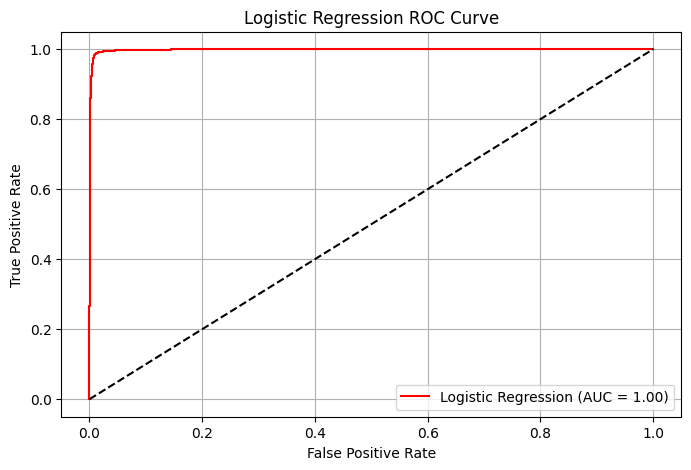

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


# Check if X_train and X_test are sparse matrices or text data
print(type(X_train))  # Should print something like <class 'pandas.core.series.Series'> for text
print(type(X_test))   # Should print something like <class 'pandas.core.series.Series'> for text

# If X_train and X_test are already sparse matrices, skip vectorization
if isinstance(X_train, str) and isinstance(X_test, str):
    # Vectorization should be done here if X_train and X_test are raw text
    vectorizer = TfidfVectorizer()
    X_train_vec = vectorizer.fit_transform(X_train)  # Apply vectorization
    X_test_vec = vectorizer.transform(X_test)        # Apply vectorization to test data
else:
    # If X_train and X_test are already sparse matrices, directly use them
    X_train_vec = X_train
    X_test_vec = X_test



best_lre = LogisticRegression()
best_lre.fit(X_train_vec, y_train)


lre_probs = best_lre.predict_proba(X_test_vec)[:, 1]


fpr_lre, tpr_lre, _ = roc_curve(y_test, lre_probs)
auc_lre = roc_auc_score(y_test, lre_probs)


plt.figure(figsize=(8,5))
plt.plot(fpr_lre, tpr_lre, label=f'Logistic Regression (AUC = {auc_lre:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



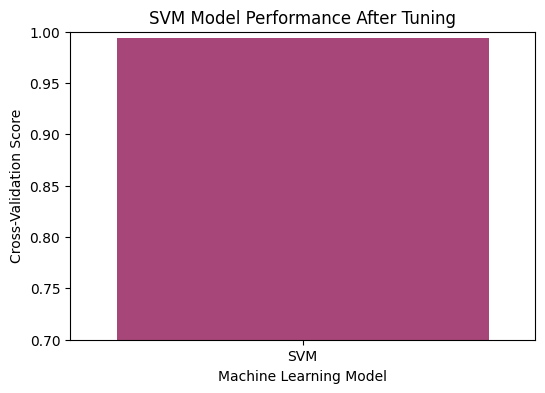

In [19]:
svm_cv_score = svm.best_score_
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.barplot(x=["SVM"], y=[svm_cv_score], hue=["SVM"], palette="magma", legend=False)
plt.xlabel("Machine Learning Model")
plt.ylabel("Cross-Validation Score")
plt.title("SVM Model Performance After Tuning")
plt.ylim(0.7, 1)
plt.show()


In [20]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV


svm_params = {
    'C': [0.1, 1, 10],
    'max_iter': [1000, 2000]
}


svm_grid = GridSearchCV(LinearSVC(), svm_params, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train_vec, y_train)


best_svm = svm_grid.best_estimator_


In [21]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Check if X_train and X_test are sparse matrices or raw text
if isinstance(X_train, str) and isinstance(X_test, str):
    # Vectorization should be done here if X_train and X_test are raw text
    tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
    X_train_vec = tfidf_vectorizer.fit_transform(X_train)  # Apply vectorization
    X_test_vec = tfidf_vectorizer.transform(X_test)        # Apply vectorization to test data
else:
    # If X_train and X_test are already sparse matrices, directly use them
    X_train_vec = X_train
    X_test_vec = X_test

# SVM Parameters and Model
svm_params = {'C': [0.1, 1, 10]}
best_svm = GridSearchCV(LinearSVC(), svm_params, cv=5, scoring='accuracy', n_jobs=-1)
best_svm.fit(X_train_vec, y_train)

# Predictions
y_pred_svm = best_svm.predict(X_test_vec)

# Performance Metrics
print("SVM Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))




SVM Model Performance:
Accuracy: 0.9946547884187082

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      4733
           1       0.99      1.00      0.99      4247

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980


Confusion Matrix:
 [[4706   27]
 [  21 4226]]


In [22]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer


X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)


tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(stop_words='english', max_df=0.7)


X_train_tfidf = tfidf.fit_transform(X_train)


X_test_tfidf = tfidf.transform(X_test)


In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


lre_model = LogisticRegression(max_iter=1000)


lre_model.fit(X_train_tfidf, y_train)


lre_pred = lre_model.predict(X_test_tfidf)


print("Accuracy:", accuracy_score(y_test, lre_pred))
print("Classification Report:\n", classification_report(y_test, lre_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lre_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, lre_model.predict_proba(X_test_tfidf)[:, 1]))

# Cross-validation score
cv_score_lre = cross_val_score(lre_model, X_train_tfidf, y_train, cv=5).mean()
print("Cross-Validation Score (5-fold):", cv_score_lre)


Accuracy: 0.9846325167037862
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      4733
           1       0.98      0.99      0.98      4247

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980

Confusion Matrix:
 [[4658   75]
 [  63 4184]]
ROC-AUC Score: 0.9979296107452291
Cross-Validation Score (5-fold): 0.9822930293222025


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

# Initialize vectorizer
vectorizer = TfidfVectorizer()

# Vectorize the training data
X_train_vec = vectorizer.fit_transform(X_train)

# Initialize Multinomial Naive Bayes (best_mnb) and SVM (best_svm)
# For SVM, we use GridSearchCV for hyperparameter tuning
svm_params = {'C': [0.1, 1, 10]}
best_svm = GridSearchCV(LinearSVC(), svm_params, cv=5, scoring='accuracy', n_jobs=-1)

# Fit both models
best_mnb.fit(X_train_vec, y_train)
best_svm.fit(X_train_vec, y_train)

# Vectorize the test data
X_test_vec = vectorizer.transform(X_test)

# Make predictions
y_pred_mnb = best_mnb.predict(X_test_vec)
y_pred_svm = best_svm.predict(X_test_vec)

# You can now use the predictions, for example, printing classification reports
from sklearn.metrics import classification_report

print("MNB Classification Report:\n", classification_report(y_test, y_pred_mnb))
print("SVM Classification Report:\n", classification_report(y_test, y_pred_svm))


MNB Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.94      4733
           1       0.94      0.93      0.94      4247

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980

SVM Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4733
           1       1.00      1.00      1.00      4247

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980



In [28]:
from sklearn.metrics import precision_score, recall_score, f1_score


print("Precision (MNB):", precision_score(y_test, y_pred_mnb))
print("Recall (MNB):", recall_score(y_test, y_pred_mnb))
print("F1 Score (MNB):", f1_score(y_test, y_pred_mnb))


print("Precision (SVM):", precision_score(y_test, y_pred_svm))
print("Recall (SVM):", recall_score(y_test, y_pred_svm))
print("F1 Score (SVM):", f1_score(y_test, y_pred_svm))



Precision (MNB): 0.9442983504661726
Recall (MNB): 0.9300682834942312
F1 Score (MNB): 0.9371293001186239
Precision (SVM): 0.9964647654961113
Recall (SVM): 0.9955262538262303
F1 Score (SVM): 0.9959952885747939


In [29]:

y_pred_mnb = best_mnb.predict(X_test_vec)
y_pred_svm = best_svm.predict(X_test_vec)


from sklearn.metrics import precision_score, recall_score, f1_score


mnb_precision = precision_score(y_test, y_pred_mnb)
mnb_recall = recall_score(y_test, y_pred_mnb)
mnb_f1 = f1_score(y_test, y_pred_mnb)


svm_precision = precision_score(y_test, y_pred_svm)
svm_recall = recall_score(y_test, y_pred_svm)
svm_f1 = f1_score(y_test, y_pred_svm)



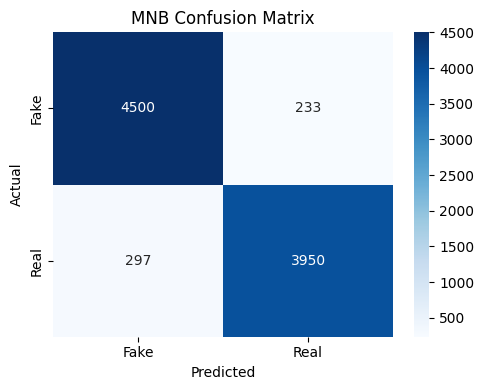

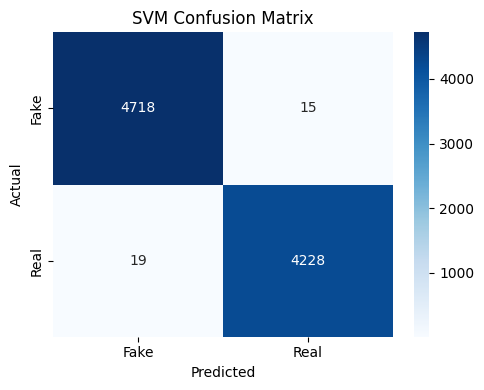

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_conf_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.tight_layout()
    plt.show()


plot_conf_matrix(y_test, y_pred_mnb, title="MNB Confusion Matrix")


plot_conf_matrix(y_test, y_pred_svm, title="SVM Confusion Matrix")


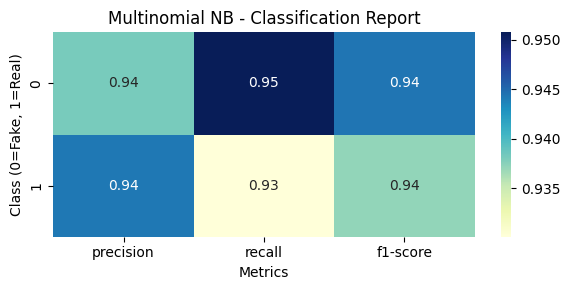

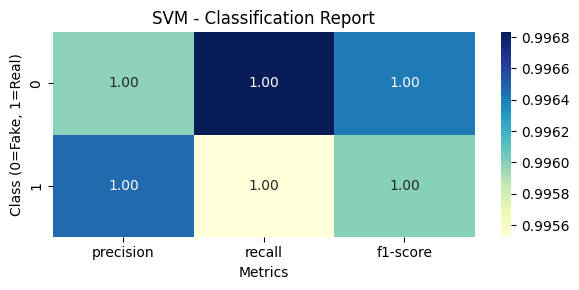

In [31]:
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_classification_report_heatmap(y_true, y_pred, model_name):
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()

    # Remove 'accuracy', 'macro avg', and 'weighted avg' if you want to focus only on class-wise performance
    class_df = report_df.loc[['0', '1']]  # 0 = Fake, 1 = Real

    plt.figure(figsize=(6, 3))
    sns.heatmap(class_df.iloc[:, :-1], annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title(f"{model_name} - Classification Report")
    plt.xlabel("Metrics")
    plt.ylabel("Class (0=Fake, 1=Real)")
    plt.tight_layout()
    plt.show()

# Plot for Multinomial Naive Bayes
plot_classification_report_heatmap(y_test, y_pred_mnb, "Multinomial NB")

# Plot for SVM
plot_classification_report_heatmap(y_test, y_pred_svm, "SVM")



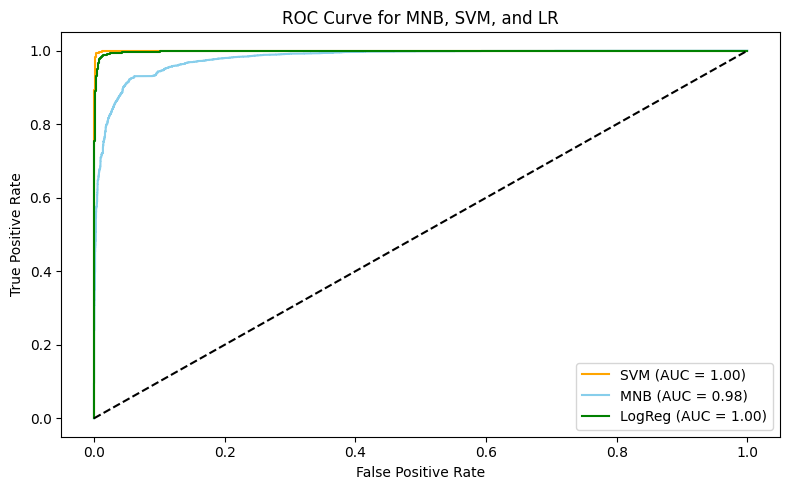

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


X_test_vec = vectorizer.transform(X_test)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


vectorizer = TfidfVectorizer(stop_words='english', max_features=50000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


best_mnb = MultinomialNB()
best_lr = LogisticRegression(max_iter=1000)
best_svm = LinearSVC()

best_mnb.fit(X_train_vec, y_train)
best_lr.fit(X_train_vec, y_train)
best_svm.fit(X_train_vec, y_train)


svm_probs = best_svm.decision_function(X_test_vec)
mnb_probs = best_mnb.predict_proba(X_test_vec)[:, 1]
lr_probs = best_lr.predict_proba(X_test_vec)[:, 1]


fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_probs)
fpr_mnb, tpr_mnb, _ = roc_curve(y_test, mnb_probs)
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)

# Plot ROC Curves
plt.figure(figsize=(8, 5))
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_score(y_test, svm_probs):.2f})', color='orange')
plt.plot(fpr_mnb, tpr_mnb, label=f'MNB (AUC = {roc_auc_score(y_test, mnb_probs):.2f})', color='skyblue')
plt.plot(fpr_lr, tpr_lr, label=f'LogReg (AUC = {roc_auc_score(y_test, lr_probs):.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--')  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for MNB, SVM, and LR")
plt.legend()
plt.tight_layout()
plt.show()

